### 计算机模拟HW4
**3180105843 汪奕晨**

In [1]:
from scipy import stats
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.io as scio
import time

ModuleNotFoundError: No module named 'scipy'

In [28]:
class tsp_anneal():
    def __init__(self, city, t0, maxit, iter_time):
        self.city = city
        self.n = dots.shape[1]
        self.t0 = t0
        self.maxit = maxit
        self.iter_time = iter_time
        # self.ans 
        

    def tspsa(self):
        # 在有些不需要copy的地方，只传地址会更快
        k = 0
        t = self.t0
        x = self.city
        dx = self.distance(x)
        ds = dx

        start_time = time.time()
        percent = 0.05
        for i in range(self.iter_time):
            while (k < self.maxit):
                if (dx < ds):
                    xs = x
                    ds = dx
                y = self.swapcities(x)
                dy = self.distance(y)
                h = min(1, np.exp(-(dy - dx)/t))
                U = np.random.rand()
                if (U < h):
                    # x = y.copy()
                    x = y
                    dx = dy # 这里优化了更新dx的方法
                k = k + 1
            t *= (1 - 1 / (50 + np.log(i + 1)))
            k = 0
            if i > percent * self.iter_time:
                print('{0:02.0f}%'.format(percent*100), end=' ') # 打印以追踪进度
                percent += 0.05

        end_time = time.time()
        print('\nrun time: {0:}'.format(end_time - start_time))
        self.best_ans = xs
        self.shortest_dist = ds
        return xs


    def swapcities(self, cityXY):
        nodes = np.random.choice(self.n, 2, False)
        city_1 = min(nodes)
        city_2 = max(nodes)

        s = np.hstack((cityXY[:,0: city_1], cityXY[:,city_2:city_1:-1], cityXY[:,city_1:city_1 + 1], cityXY[:,city_2 + 1:]))
        # 这里使用了加一使得得到的矩阵的列宽为1，否则使用.shape会输出空的列宽，可以防止hstack报错 'dimention 不一致'
        return s

    
    @staticmethod
    def dis2(x, y):
        return np.sqrt( (x-y)[0] * (x-y)[0] + (x-y)[1] * (x-y)[1]  )


    @staticmethod
    def distance(city):
        dd = tsp_anneal.dis2(city[:,:-1], city[:, 1:])
        d = np.sum(dd)
        #使用向量化可以极大地提高计算速度
        d += tsp_anneal.dis2(city[:, -1], city[:, 0])
        return d


    def plotcities(self):
        cityXY = self.ans
        try:
            plt.figure()
            plt.plot(cityXY[0, :], cityXY[1, :], 'b*')
            plt.plot(cityXY[0, :], cityXY[1, :], 'b')
            plt.plot([cityXY[0, -1:], cityXY[0, 0]], [cityXY[1, -1:], cityXY[1, 0]], 'b')
            plt.show()
        except:
            raise ValueError('no figure to plot')



def moduletest(cities, T0, MAXIT, N):
    time_start = time.time()
    x = TSPSA(cities, T0, MAXIT, N)
    time_end = time.time()
    dist = distance(x)
    return dist, time_end - time_start, x




In [29]:
tsp_size = 100
dots = np.random.rand(2,tsp_size)
tspa = tsp_anneal(dots, 20, 2000, 600)

05%  10%  15%  20%  25%  30%  35%  40%  45%  50%  55%  60%  65%  70%  75%  80%  85%  90%  95%  run time: 782.1044692993164


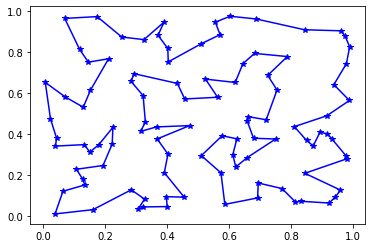

In [30]:
tspa.tspsa()
tspa.plotcities()

In [85]:
cityXY = scio.loadmat('cityXY.mat')
cityXY = cityXY['cityXY']

In [86]:
dist, t, x = moduletest(cityXY, 20, 2000, 600)

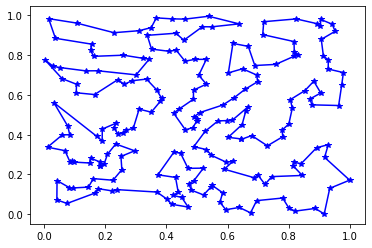

In [87]:
plotcities(x)

In [32]:
plt.figure()
plt.

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>